In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras import layers
from keras import callbacks
import matplotlib.pyplot as plt

In [4]:
train_data = pd.read_csv("train.csv")
X = train_data.drop(columns="label")
y = train_data["label"]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0)

X_train /= 255
X_valid /= 255

X_train = X_train.to_numpy().reshape(X_train.shape[0], 28, 28, 1)
X_valid = X_valid.to_numpy().reshape(X_valid.shape[0], 28, 28, 1)

In [5]:
conv_model = keras.Sequential([
  layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(28, 28, 1)),
  layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(128, activation="relu"),
  layers.Dropout(0.5),
  layers.Dense(10, activation="softmax")
])
conv_model.compile(
  optimizer="adam",
  loss="sparse_categorical_crossentropy",
  metrics=["accuracy"]
)

early_stopping = callbacks.EarlyStopping(
    min_delta=0.0001,
    patience=10,
    restore_best_weights=True,
)

history = conv_model.fit(
  X_train, y_train,
  validation_data=(X_valid, y_valid),
  epochs=50,
  batch_size=32,
  callbacks=[early_stopping],
  verbose=1
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()

Epoch 1/50
769/985 [======================>.......] - ETA: 11s - loss: 0.2957 - accuracy: 0.9082

KeyboardInterrupt: 

In [49]:
def make_submission(model, test_data):
  predictions = model.predict(test_data)
  
  final_predictions = []
  for i in range(len(predictions)):
    max = 0
    index_max = 0
    for j in range(10):
      if predictions[i][j] > max:
        max = predictions[i][j]
        index_max = j
    final_predictions.append(index_max)
  predictions_df = pd.DataFrame(data={"ImageId": range(1, 1 + len(test_data)), "Label": final_predictions})
  predictions_df.to_csv("submission.csv", index=False)

test_data = pd.read_csv("test.csv")
test_data /= 256
test_data = test_data.to_numpy().reshape(test_data.shape[0], 28, 28, 1)
make_submission(conv_model, test_data)

875/875 [==============================] - 9s 10ms/step


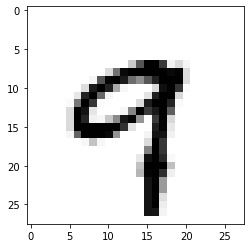

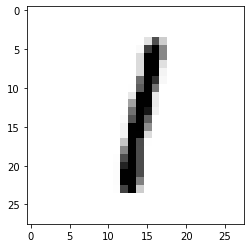

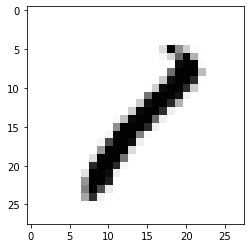

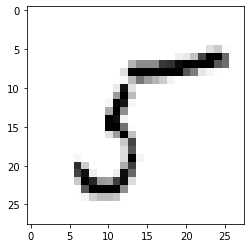

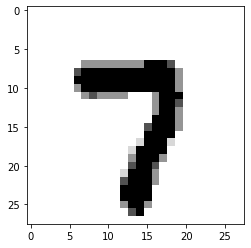

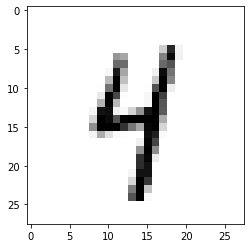

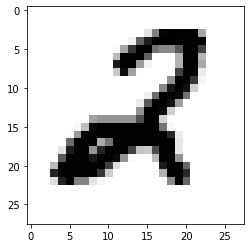

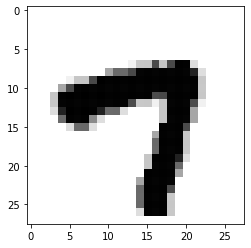

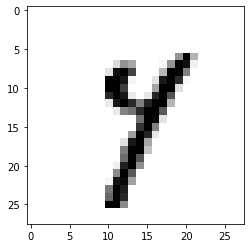

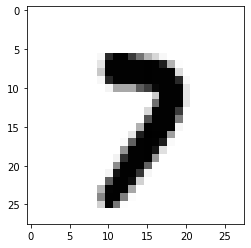

In [59]:
for i in range(20, 30):
  plt.imshow(test_data[i], cmap='Greys')
  plt.show()